# Stock Market News Analysis

In [1]:
# Import Basic Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
from nltk.sentiment import SentimentIntensityAnalyzer 
from wordcloud import WordCloud
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\liulj\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
# Make a directory
import os, sys
notebook_dir = os.getcwd()

sys.path.append(os.path.abspath(os.path.join(notebook_dir, '..')))

In [3]:
from scripts.data_loader import load_stock_news
from scripts.eda import data_summary, summary_statistics, value_count

In [20]:
from scripts.sentiment_analsis import sentiment_data_visualization, generate_wordcloud

In [23]:
from scripts.time_series_analysis import article_publication_time_anaysis

In [4]:
# load data
news_data = load_stock_news(r"C:\Users\liulj\Desktop\KAIM\stock-market-data\raw_analyst_ratings.csv")

### Explatory Data Anaysis of Stock News Data

In [5]:
# Analysis Data
data_summary(news_data)

Head of Stock market data
   Unnamed: 0                                           headline  \
0           0            Stocks That Hit 52-Week Highs On Friday   
1           1         Stocks That Hit 52-Week Highs On Wednesday   
2           2                      71 Biggest Movers From Friday   
3           3       46 Stocks Moving In Friday's Mid-Day Session   
4           4  B of A Securities Maintains Neutral on Agilent...   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   
2  https://www.benzinga.com/news/20/05/16103463/7...         Lisa Levin   
3  https://www.benzinga.com/news/20/05/16095921/4...         Lisa Levin   
4  https://www.benzinga.com/news/20/05/16095304/b...         Vick Meyer   

                        date stock  
0  2020-06-05 10:30:54-04:00     A  
1  2020-06-03 10:45:20-04:00     A  
2  

Stastistical discription of each column

count           1407328
unique             1034
top       Paul Quintaro
freq             228373
Name: publisher, dtype: object


c:\Users\liulj\Desktop\KAIM\Stock-Market-Analysis\scripts\eda.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column_names], kde=True, palette="viridis")


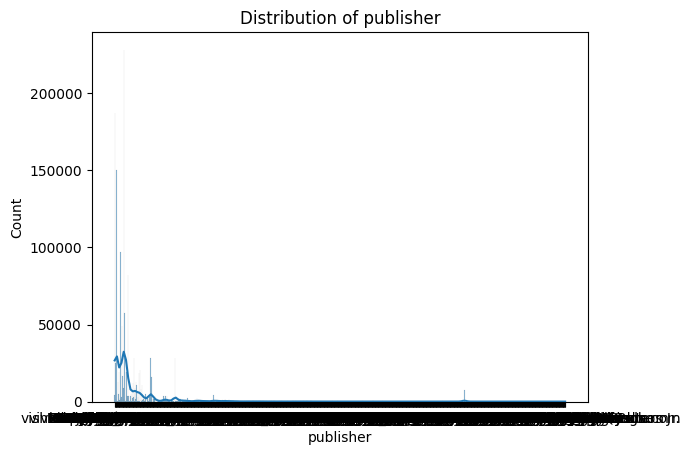

In [6]:
# Publisher colums
summary_statistics(news_data, 'publisher')

count     1407328
unique       6204
top           MRK
freq         3333
Name: stock, dtype: object


c:\Users\liulj\Desktop\KAIM\Stock-Market-Analysis\scripts\eda.py:27: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[column_names], kde=True, palette="viridis")


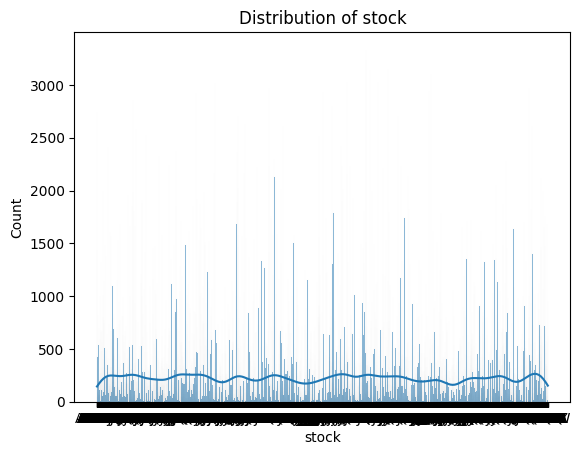

In [7]:
# Stock columns
summary_statistics(news_data, 'stock')

### Descriptive Statistics

**Count Number of Publisher companies and Visualize it**
* To know which publisher publish more

Top 10  publisher
publisher
Paul Quintaro        228373
Lisa Levin           186979
Benzinga Newsdesk    150484
Charles Gross         96732
Monica Gerson         82380
Name: count, dtype: int64


c:\Users\liulj\Desktop\KAIM\Stock-Market-Analysis\scripts\eda.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette="viridis")


AttributeError: 'str' object has no attribute 'items'

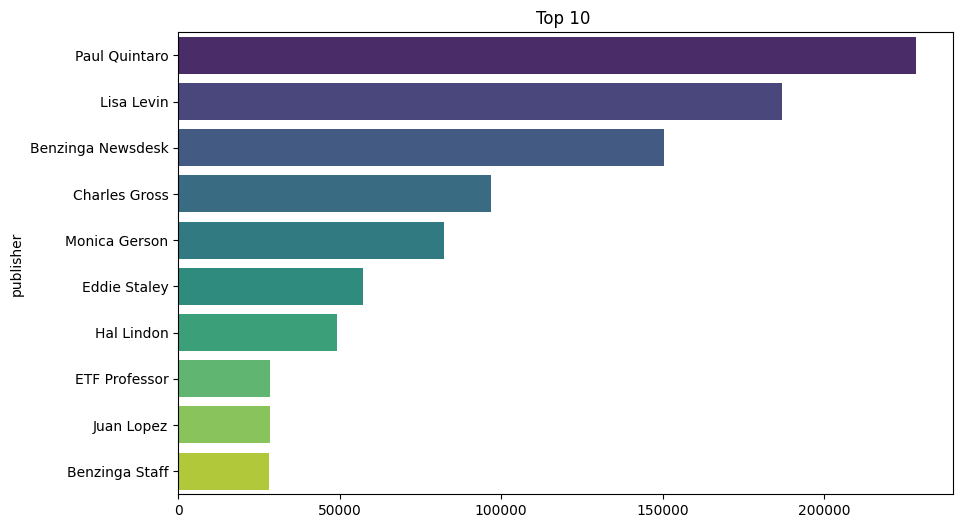

In [8]:
value_count(news_data, 'publisher')

**Count Number of Stock and Visualize it**

Top 10  stock
stock
MRK     3333
MS      3238
NVDA    3146
MU      3142
QQQ     3106
Name: count, dtype: int64


c:\Users\liulj\Desktop\KAIM\Stock-Market-Analysis\scripts\eda.py:40: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top.values, y=top.index, palette="viridis")


AttributeError: 'str' object has no attribute 'items'

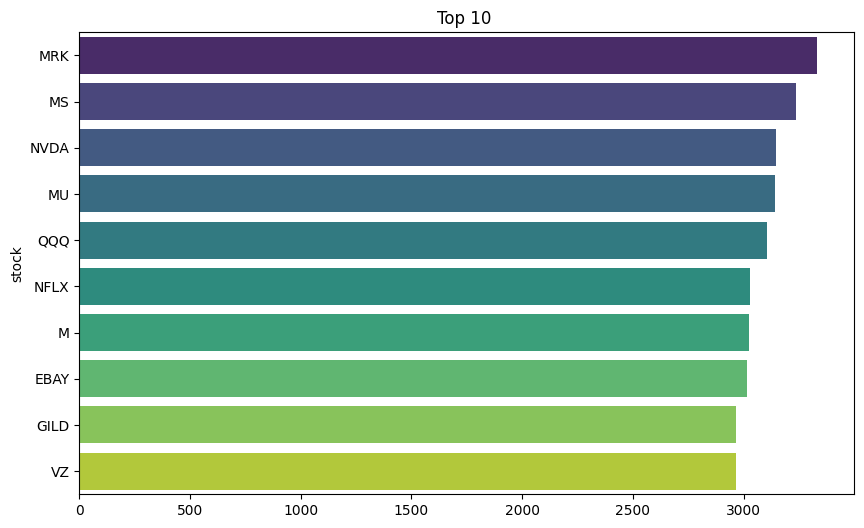

In [9]:
value_count(news_data, 'stock')

**Date Trend Analysis**
* Analyze trends in publication dates and news frequency over time

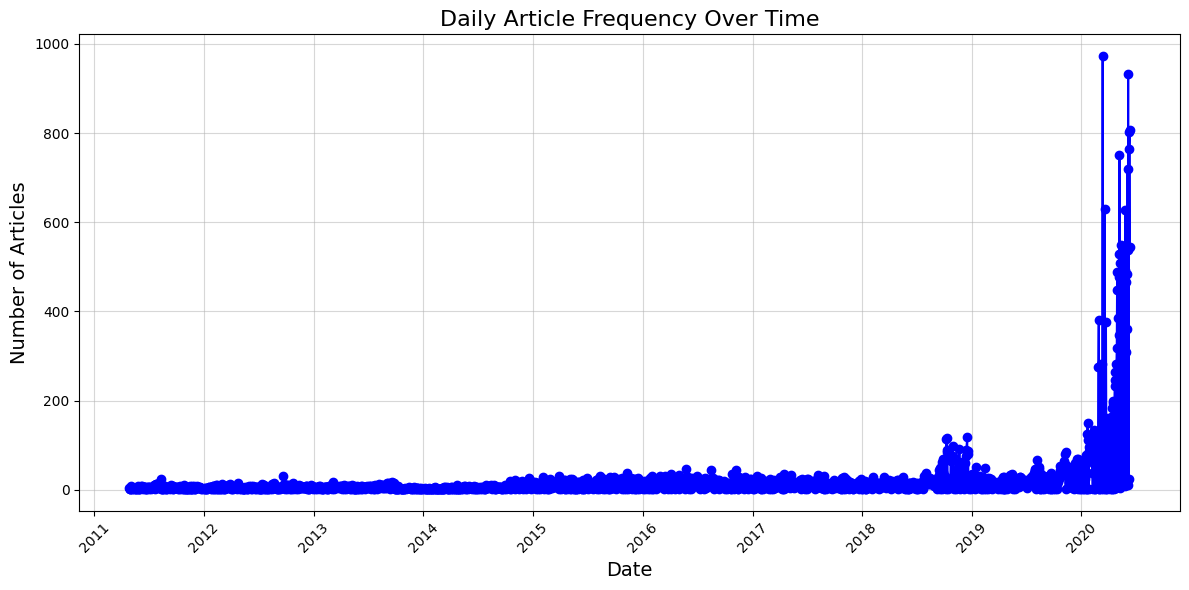

In [11]:
def data_trend_analysis(df):
    # Convert date to datetime format
    df['date'] = pd.to_datetime(df['date'], errors='coerce', utc=True)

    # Extract the date (ignoring time)
    df['publish_date'] = df['date'].dt.date

    # Aggregate to count the number of articles per day
    daily_trends = df.groupby('publish_date').size().reset_index(name='article_count')

    # Plot the trend
    plt.figure(figsize=(12, 6))
    plt.plot(daily_trends['publish_date'], daily_trends['article_count'], marker='o', linestyle='-', color='b')
    plt.title('Daily Article Frequency Over Time', fontsize=16)
    plt.xlabel('Date', fontsize=14)
    plt.ylabel('Number of Articles', fontsize=14)
    plt.xticks(rotation=45)
    plt.grid(alpha=0.5)
    plt.tight_layout()
    plt.show()

data_trend_analysis(news_data)

### Sentiment analysis & Topic Modeling

**Sentiment Analysis Using `SentimentIntensityAnalyzer`**

In [13]:
# Sentiment Analysis
# Performs sentiment analysis on headlines.
sia = SentimentIntensityAnalyzer()
news_data['sentiment'] = news_data['headline'].apply(lambda x: sia.polarity_scores(x)['compound'])
news_data['sentiment_category'] = pd.cut(news_data['sentiment'], bins=[-1, -0.1, 0.1, 1], labels=['Negative', 'Neutral', 'Positive'])

sentiment_counts = news_data['sentiment_category'].value_counts()
print("\nSentiment Analysis Results:\n", sentiment_counts)



news_data.head()


Sentiment Analysis Results:
 sentiment_category
Neutral     753395
Positive    435480
Negative    218453
Name: count, dtype: int64


,Unnamed: 0,headline,url,publisher,date,stock,publish_date,sentiment,sentiment_category
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 14:30:54+00:00,A,2020-06-05,0.000,Neutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 14:45:20+00:00,A,2020-06-03,0.000,Neutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 08:30:07+00:00,A,2020-05-26,0.000,Neutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 16:45:06+00:00,A,2020-05-22,0.000,Neutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 15:38:59+00:00,A,2020-05-22,0.296,Positive


c:\Users\liulj\Desktop\KAIM\Stock-Market-Analysis\scripts\sentiment_analsis.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=sentimental_data, x='sentiment_category', palette='coolwarm')


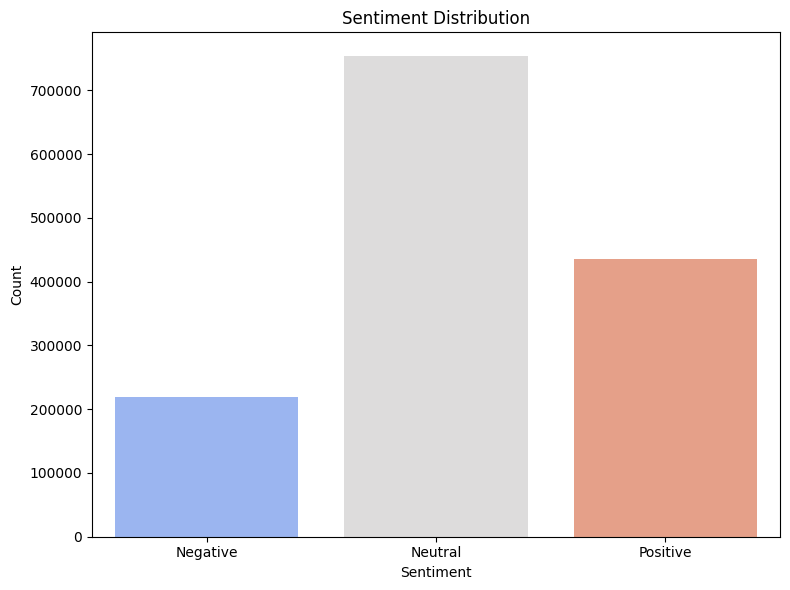

In [14]:
# Plot sentiment distribution
sentiment_data_visualization(news_data)

**Word Cloud**
* word cloud of headline news

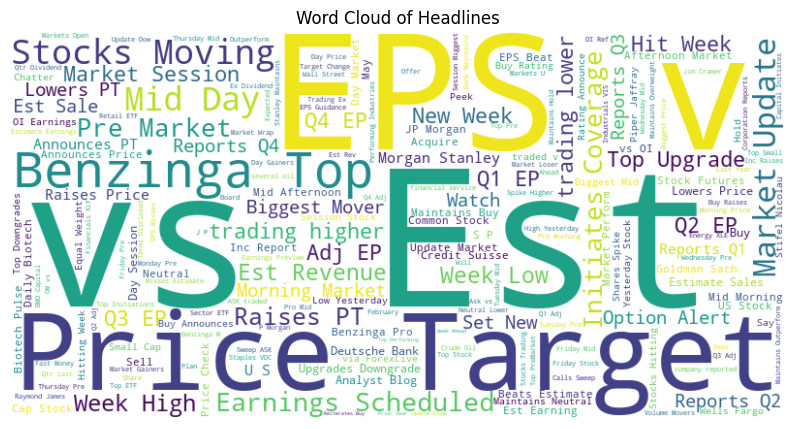

In [15]:
# Generate Word Cloud
generate_wordcloud(news_data)

### Time Series Analysis

* Analyze Publication data in hourly, daily and weekly distiribution

In [24]:
article_publication_time_anaysis(news_data)

NameError: name 'pd' is not defined